# Data cleaning of 7-Day Nutritional Analysis of Healthy Omnivore, Fast Food, and Vegetarian Diets

## Imoporting the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# Load the data
df = pd.read_csv('../data/raw/7_days_multi_menu_nutrition_data.csv')

#Set the pandas options to display more columns
pd.set_option('display.max_columns', None)   # Show all columns

# Display the first few rows
df.head(30)

,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Menu Type,Day,Meal
0,3 large eggs,214.50,18.84,14.27,4.6890,5.4870,2.8665,1.08,0.00,0.56,84.0000,2.6250,18.000,297.00,207.0000,213.00,1.9350,0.1080,0.0420,46.0500,810.00,0.000,123.0,1.5750,0.450,0.0600,0.6855,0.1125,0.2550,70.50,1.335,2.2995,440.7000,0.0540,0.0015,558.0,Omnivore,Day 1,Breakfast - Tomato Shakshuka
1,1 small onion,26.40,0.82,0.11,0.0186,0.0162,0.0438,6.09,0.84,2.84,13.2000,0.1440,6.600,21.00,99.6000,1.80,0.1260,0.0402,0.0918,0.3600,1.20,3.120,0.0,0.0120,0.300,0.0252,0.0138,0.0990,0.0774,9.00,0.000,0.0678,4.0800,NaN,NaN,0.0,Omnivore,Day 1,Breakfast - Tomato Shakshuka
2,2 large tomatoes,65.52,3.20,0.73,0.1019,0.1128,0.3021,14.16,4.37,9.57,36.4000,0.9828,40.040,87.36,862.6800,18.20,0.6188,0.2148,0.4150,0.0000,3032.12,49.868,0.0,1.9656,28.756,0.1347,0.0692,2.1622,0.2912,54.60,0.000,0.3240,24.3880,NaN,NaN,0.0,Omnivore,Day 1,Breakfast - Tomato Shakshuka
3,1 sweet pepper,31.92,1.05,0.23,0.0331,0.0148,0.1208,7.64,1.37,3.64,10.2600,0.5244,11.400,20.52,189.2400,2.28,0.1368,0.0741,0.1311,0.3420,533.52,84.816,0.0,0.5700,11.172,0.0673,0.0342,0.5438,0.2656,18.24,0.000,0.0901,8.4360,NaN,NaN,0.0,Omnivore,Day 1,Breakfast - Tomato Shakshuka
4,10 ml olive oil,80.71,0.00,9.13,1.2606,6.6611,0.9607,0.00,0.00,0.00,0.0913,0.0511,0.000,0.00,0.0913,0.18,0.0000,0.0000,0.0000,0.0000,0.00,0.000,0.0,1.3101,5.496,0.0000,0.0000,0.0000,0.0000,0.00,0.000,0.0000,0.0274,NaN,NaN,0.0,Omnivore,Day 1,Breakfast - Tomato Shakshuka
5,30 g goat cheese,79.20,5.56,6.32,4.3725,1.4421,0.1503,0.00,0.00,0.00,42.0000,0.5700,4.800,76.80,7.8000,137.70,0.2760,0.2196,0.0300,0.8400,309.90,0.000,4.5,0.0540,0.540,0.0210,0.1140,0.1290,0.0750,3.60,0.057,0.2040,4.6200,NaN,NaN,13.8,Omnivore,Day 1,Breakfast - Tomato Shakshuka
6,10 g raw almonds,57.90,2.12,4.99,0.3802,3.1551,1.2329,2.15,1.25,0.44,26.9000,0.3710,27.000,48.10,73.3000,0.10,0.3120,0.1031,0.2179,0.4100,0.20,0.000,0.0,2.5630,0.000,0.0205,0.1138,0.3618,0.0137,4.40,0.000,0.0471,5.2100,0.0003,NaN,0.0,Omnivore,Day 1,Snack
7,15 g raw cashew,82.95,2.73,6.58,1.1675,3.5696,1.1768,4.53,0.50,0.89,5.5500,1.0020,43.800,88.95,99.0000,1.80,0.8670,0.3293,0.2483,2.9850,0.00,0.075,0.0,0.1350,5.115,0.0635,0.0087,0.1593,0.0626,3.75,0.000,0.1296,NaN,NaN,NaN,0.0,Omnivore,Day 1,Snack
8,300 g fresh blueberries,171.00,2.22,0.99,0.0840,0.1410,0.4380,43.47,7.20,29.88,18.0000,0.8400,18.000,36.00,231.0000,3.00,0.4800,0.1710,1.0080,0.3000,162.00,29.100,0.0,1.7100,57.900,0.1110,0.1230,1.2540,0.1560,18.00,0.000,0.3720,18.0000,NaN,NaN,0.0,Omnivore,Day 1,Snack
9,80 g egg tagliatelle,114.40,10.05,7.61,2.5008,2.9264,1.5288,0.58,0.00,0.30,44.8000,1.4000,9.600,158.40,110.4000,113.60,1.0320,0.0576,0.0224,24.5600,432.00,0.000,65.6,0.8400,0.240,0.0320,0.3656,0.0600,0.1360,37.60,0.712,1.2264,235.0400,0.0288,0.0008,297.6,Omnivore,Day 1,Lunch - Pasta with Meat


## Check the data

In [3]:
# Get the shape of the DataFrame
df.shape 

(391, 39)

In [4]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [5]:
# Check for the missing values
null_values  = df.isnull().sum()
print("Missing values per column:\n", null_values)

Missing values per column:
 Ingredient               0
Calories                 0
Protein                  0
Fat                      0
Saturated Fat            2
Monounsaturated Fat      6
Polyunsaturated Fat      6
Carbohydrates            0
Fiber                    9
Sugars                  20
Calcium                  0
Iron                     0
Magnesium                1
Phosphorus               3
Potassium                1
Sodium                   0
Zinc                     1
Copper                   3
Manganese                9
Selenium                14
Vitamin A                3
Vitamin C                3
Vitamin D               21
Vitamin E               22
Vitamin K               29
Thiamin                  4
Riboflavin               2
Niacin                   4
Vitamin B6               6
Folate                   7
Vitamin B12              3
Pantothenic Acid        21
Choline                 44
Omega-3 Fatty Acids    289
Omega-6 Fatty Acids    342
Cholesterol              1


In [6]:
# Unique values in categorical columns
print("Unique values in Menu Type:", df['Menu Type'].unique())
print("Unique values in Day:", df['Day'].unique())
print("Unique values in Meal:", df['Meal'].unique())

Unique values in Menu Type: ['Omnivore' 'Vegetarian' 'Fast Food']
Unique values in Day: ['Day 1' 'Day 2' 'Day 3' 'Day 4' 'Day 5' 'Day 6' 'Day 7']
Unique values in Meal: ['Breakfast - Tomato Shakshuka' 'Snack' 'Lunch - Pasta with Meat'
 'Supper - Very Tender Sea Bass' 'Breakfast - Smurkbrod with Herring'
 'Lunch - Chicken Legs with Potatoes and Tomatoes'
 'Supper - Baked Wild Alaska Pollock' 'Breakfast - Classic Omelet'
 'Lunch - Autumn Pasta with Broccoli and Anchovies'
 'Supper - Instant Light Pike Perch with Rosemary'
 'Breakfast - Avocado Toast' 'Lunch - Polenta with Mushroom Gravy'
 'Supper - Pickled Tofu' 'Breakfast - Berry Breakfast with Spelt'
 'Lunch - Broccoli in Oyster Sauce with Cashews'
 'Supper - Vegetable Salad with White Quinoa and Leftovers'
 'Breakfast - Coconut Pancakes without Flour'
 "Lunch - 'Steak' of Tofu with Mushrooms or Guacamole"
 'Supper - Stewed Young Peas with Rice (Croatian Rizhi-Biji)'
 'Breakfast - Ham Croissant Sandwich' 'Lunch - Big Mac with Green Sal

As observed, the dataset comprises a structured DataFrame with several 391 rows and 39 columns, with no duplicate entries detected. The data covers three unique menu types — Omnivore, Vegetarian, and Fast Food—spanning a period of 7 days. Each day's menu consists of four meals: Breakfast, Snack, Lunch, and Supper.

Additionally, some columns contain a significant number of NaN values, especially in micronutrients like Omega-3 and Omega-6 fatty acids. Given this, my next step will focus on handling these missing values to ensure data completeness before analysis.

## Data Cleaning

### Handling missing values

**Mean Imputation**: for columns with a few missing values (e.g., Saturated Fat, Magnesium), filling with the mean is reasonable to preserve data completeness.

**Zero Imputation**: for columns with significant missing values (e.g., Omega-3 Fatty Acids, Vitamin E), it’s reasonable to assume that the ingredient doesn’t contain this nutrient, so filling with zero is appropriate.

**Median Imputation**: for a single missing value in Cholesterol, the median provides a robust estimate without skewing the data.

In [7]:
# Macronutrients and Fats
# Fill missing values with mean or zero if they are typically not present in some ingredients

# Saturated, Monounsaturated, and Polyunsaturated Fat
df['Saturated Fat'].fillna(0, inplace=True)
df['Monounsaturated Fat'].fillna(0, inplace=True)
df['Polyunsaturated Fat'].fillna(0, inplace=True)

In [8]:
# Fiber and Sugars
# These are generally zero in some ingredients (e.g., oils), so fill with zero
df['Fiber'].fillna(0, inplace=True)
df['Sugars'].fillna(0, inplace=True)

In [9]:
# Minerals
# Fill with mean where there are only a few missing values; otherwise, use zero if the absence likely indicates no content

df['Magnesium'].fillna(df['Magnesium'].mean(), inplace=True)
df['Phosphorus'].fillna(df['Phosphorus'].mean(), inplace=True)
df['Potassium'].fillna(df['Potassium'].mean(), inplace=True)
df['Zinc'].fillna(df['Zinc'].mean(), inplace=True)
df['Copper'].fillna(df['Copper'].mean(), inplace=True)
df['Manganese'].fillna(df['Manganese'].mean(), inplace=True)
df['Selenium'].fillna(0, inplace=True)  # Higher number of missing values; assume zero where absent

In [10]:
# Vitamins
# Fill missing values with zero for those with a significant number of missing values; use mean for fewer missing values

df['Vitamin A'].fillna(df['Vitamin A'].mean(), inplace=True)
df['Vitamin C'].fillna(df['Vitamin C'].mean(), inplace=True)
df['Vitamin D'].fillna(df['Vitamin D'].mean(), inplace=True)
df['Vitamin E'].fillna(0, inplace=True)  # Assume zero if missing due to significant gaps
df['Vitamin K'].fillna(0, inplace=True)  # Assume zero if missing
df['Thiamin'].fillna(df['Thiamin'].mean(), inplace=True)
df['Riboflavin'].fillna(df['Riboflavin'].mean(), inplace=True)
df['Niacin'].fillna(df['Niacin'].mean(), inplace=True)
df['Vitamin B6'].fillna(df['Vitamin B6'].mean(), inplace=True)
df['Folate'].fillna(df['Folate'].mean(), inplace=True)
df['Vitamin B12'].fillna(df['Vitamin B12'].mean(), inplace=True)
df['Pantothenic Acid'].fillna(df['Pantothenic Acid'].mean(), inplace=True)
df['Choline'].fillna(0, inplace=True)  # Assume zero if missing

In [11]:
# Omega-3 and Omega-6 Fatty Acids
# These fatty acids are often missing in ingredients that do not contain them, so it's reasonable to fill with zero

df['Omega-3 Fatty Acids'].fillna(0, inplace=True)
df['Omega-6 Fatty Acids'].fillna(0, inplace=True)

In [12]:
# Cholesterol
# Only one missing value, so fill with the median.

df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

In [13]:
#Verify that all the missing values have been handled
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Ingredient             0
Calories               0
Protein                0
Fat                    0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Carbohydrates          0
Fiber                  0
Sugars                 0
Calcium                0
Iron                   0
Magnesium              0
Phosphorus             0
Potassium              0
Sodium                 0
Zinc                   0
Copper                 0
Manganese              0
Selenium               0
Vitamin A              0
Vitamin C              0
Vitamin D              0
Vitamin E              0
Vitamin K              0
Thiamin                0
Riboflavin             0
Niacin                 0
Vitamin B6             0
Folate                 0
Vitamin B12            0
Pantothenic Acid       0
Choline                0
Omega-3 Fatty Acids    0
Omega-6 Fatty Acids    0
Cholesterol            0
Menu Type              0
Day                    0
Meal                   

### Correct Data Types

In [14]:
# Check data types
print(df.dtypes)

Ingredient              object
Calories               float64
Protein                float64
Fat                    float64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Carbohydrates          float64
Fiber                  float64
Sugars                 float64
Calcium                float64
Iron                   float64
Magnesium              float64
Phosphorus             float64
Potassium              float64
Sodium                 float64
Zinc                   float64
Copper                 float64
Manganese              float64
Selenium               float64
Vitamin A              float64
Vitamin C              float64
Vitamin D              float64
Vitamin E              float64
Vitamin K              float64
Thiamin                float64
Riboflavin             float64
Niacin                 float64
Vitamin B6             float64
Folate                 float64
Vitamin B12            float64
Pantothenic Acid       float64
Choline 

To make my dataset more memory-efficient and optimized for analysis, I’m updating the data types of certain columns:

1. Categorical Columns (Ingredient, Menu Type, Day, Meal):

- These columns contain categorical values that represent distinct categories rather than continuous numerical values.
- By converting them to the category type, I reduce memory usage and improve performance when performing operations like grouping or filtering.

2. Numerical Columns (Calories, Protein, Fat, etc.):

- Nutrient columns are already in the float64 type, which is appropriate for values with decimals.
- No further changes are necessary for these columns, as they are correctly typed for numerical analysis.

Ensuring that each column has the correct data type helps improve both the efficiency and readability of my dataset, making it ready for analysis in the next steps.

In [15]:
# Convert categorical columns to 'category' type
df['Ingredient'] = df['Ingredient'].astype('category')
df['Menu Type'] = df['Menu Type'].astype('category')
df['Day'] = df['Day'].astype('category')
df['Meal'] = df['Meal'].astype('category')

# Verify the data types after conversion
print(df.dtypes)

Ingredient             category
Calories                float64
Protein                 float64
Fat                     float64
Saturated Fat           float64
Monounsaturated Fat     float64
Polyunsaturated Fat     float64
Carbohydrates           float64
Fiber                   float64
Sugars                  float64
Calcium                 float64
Iron                    float64
Magnesium               float64
Phosphorus              float64
Potassium               float64
Sodium                  float64
Zinc                    float64
Copper                  float64
Manganese               float64
Selenium                float64
Vitamin A               float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Thiamin                 float64
Riboflavin              float64
Niacin                  float64
Vitamin B6              float64
Folate                  float64
Vitamin B12             float64
Pantothe

### Checking for outliers

In this step, I’m identifying any outliers in the nutritional data. Outliers are extreme values that deviate significantly from other observations and can impact the accuracy of statistical analyses. Since this is nutritional data, outliers could represent genuinely high or low values for certain ingredients (like high-fat content in oils or high sugar in fruits). Therefore, I’ll identify outliers but handle them carefully to avoid removing or modifying valid data.

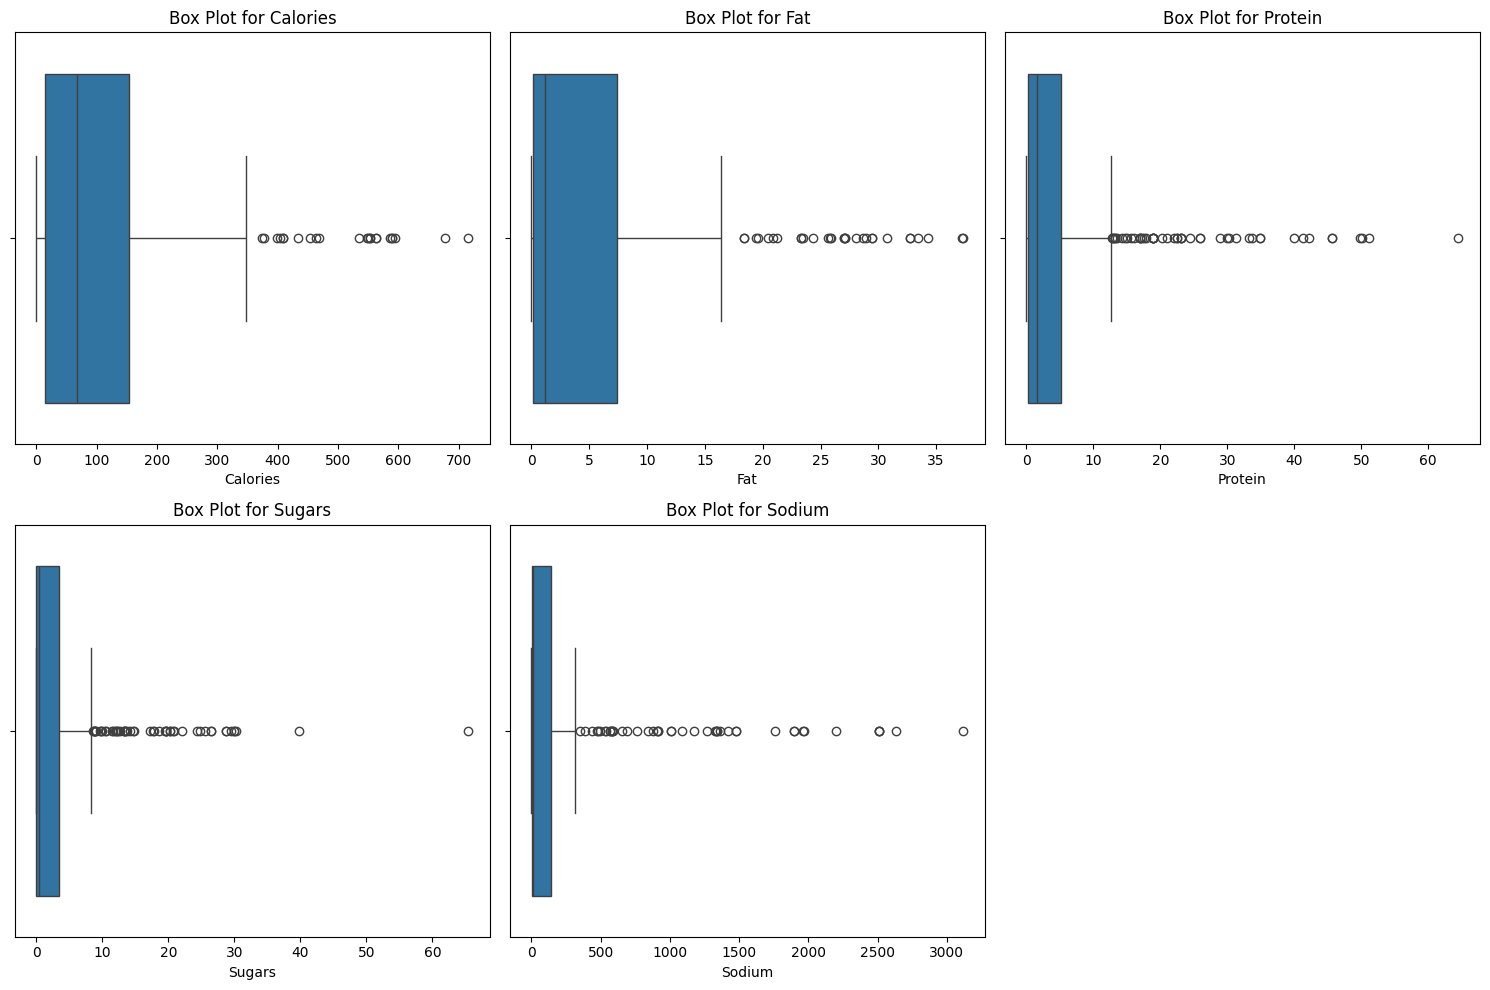

In [16]:
# Columns to check for outliers
columns_to_check = ['Calories', 'Fat', 'Protein', 'Sugars', 'Sodium']

# Plotting box plots for each nutrient
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

Considering that the dataset covers omnivore, vegetarian, and fast food menus, the outliers seen in the box plots likely reflect the nutritional characteristics typical of these diet types. 

1. Calories:

- The calorie outliers likely represent high-calorie items, which may be more prevalent in the fast food menu due to items like burgers, fries, and processed foods that are calorie-dense.
- Vegetarian and omnivore menus may have fewer extreme calorie outliers, though some high-calorie items (e.g., nuts, oils, or cheese) could contribute to occasional spikes in calories.

2. Fat:

- The outliers in fat content are likely associated with fast food items and possibly some high-fat vegetarian ingredients like cheese, nuts, or oils.
- Fast food menus generally contain higher levels of saturated and trans fats due to fried foods and processed items, while omnivore menus may have moderate fat from animal-based ingredients.
- Vegetarian menus can also include higher-fat plant-based ingredients, but this fat is often healthier (e.g., monounsaturated fats from nuts and seeds).

3. Protein:

- The high-protein outliers may come from omnivore menu items, where meat, fish, and dairy products provide substantial protein.
- Fast food menus may also contain some high-protein items, such as meat-heavy options (e.g., burgers), though the protein quality might differ due to processing.
- Vegetarian menus generally have lower protein levels but may include some high-protein items like tofu, beans, and legumes, contributing to a few protein outliers.

4. Sugars:

- The sugar outliers may be higher in the fast food menu, where processed foods, desserts, and sugary drinks can significantly increase sugar content.
- Vegetarian menus could also have high sugar content if they include a variety of fruits or sweetened items.
- Omnivore menus are less likely to have extreme sugar levels unless they include desserts or sugary sauces.

5. Sodium:

- Sodium outliers are likely driven by fast food items, which are often high in salt for flavor and preservation. Fast food is known for containing processed ingredients with elevated sodium levels.
- Omnivore menus could have moderate sodium content, particularly from sauces, condiments, or processed meats.
- Vegetarian menus might have lower sodium levels, but processed vegetarian foods (e.g., plant-based meat substitutes) could contribute to some sodium outliers.


#### Conclusion
- Fast Food Menu: contains higher outliers in calories, fat, sugars, and sodium due to the nature of processed and fried foods.
- Omnivore Menu: likely has moderate outliers in protein and fat, especially from meat and dairy products.
- Vegetarian Menu: contains outliers in healthy fats (e.g., nuts, seeds) and possibly sugars (from fruits). Protein levels are generally lower but could spike with certain protein-rich plant-based foods.
- Based on the outlier analysis, there is no need to remove these outliers from the dataset. Nutritional data inherently exhibits a wide range of values due to the diverse nature of food items across different menu types. Removing these outliers would eliminate meaningful insights about the true nutritional differences between these diet types.

### Standardizing Categorical Data

In this step, I’ll ensure that all categorical data, such as Menu Type, Day, and Meal, are consistent and standardized. This is important because inconsistencies (e.g., variations in capitalization or spelling) could lead to grouping or filtering errors in the analysis. By standardizing these values, I’ll make sure they’re uniform and ready for accurate analysis.

In [17]:
# Convert categorical columns to lowercase to standardize values
df['Menu Type'] = df['Menu Type'].str.lower()
df['Day'] = df['Day'].str.lower()
df['Meal'] = df['Meal'].str.lower()
df['Ingredient'] = df['Ingredient'].str.lower()

# Check unique values to ensure consistency
print("Unique values in 'Menu Type':", df['Menu Type'].unique())
print("Unique values in 'Day':", df['Day'].unique())
print("Unique values in 'Meal':", df['Meal'].unique())
print("Unique values in 'Ingredient':", df['Ingredient'].unique())

Unique values in 'Menu Type': ['omnivore' 'vegetarian' 'fast food']
Unique values in 'Day': ['day 1' 'day 2' 'day 3' 'day 4' 'day 5' 'day 6' 'day 7']
Unique values in 'Meal': ['breakfast - tomato shakshuka' 'snack' 'lunch - pasta with meat'
 'supper - very tender sea bass' 'breakfast - smurkbrod with herring'
 'lunch - chicken legs with potatoes and tomatoes'
 'supper - baked wild alaska pollock' 'breakfast - classic omelet'
 'lunch - autumn pasta with broccoli and anchovies'
 'supper - instant light pike perch with rosemary'
 'breakfast - avocado toast' 'lunch - polenta with mushroom gravy'
 'supper - pickled tofu' 'breakfast - berry breakfast with spelt'
 'lunch - broccoli in oyster sauce with cashews'
 'supper - vegetable salad with white quinoa and leftovers'
 'breakfast - coconut pancakes without flour'
 "lunch - 'steak' of tofu with mushrooms or guacamole"
 'supper - stewed young peas with rice (croatian rizhi-biji)'
 'breakfast - ham croissant sandwich' 'lunch - big mac with gre

## Conclusion

In [18]:
# Save the cleaned dataset to the processed folder
df.to_csv('../data/processed/cleaned_nutrition_data.csv', index=False)

The data cleaning process is now complete. I’ve handled missing values, corrected data types, identified and retained meaningful outliers, and ensured consistency in categorical data. This cleaned dataset is now prepared for the next stage of the analysis.